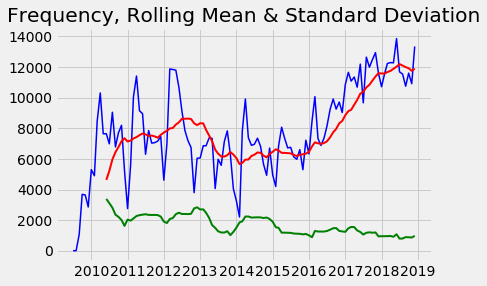

<Figure size 1440x720 with 0 Axes>

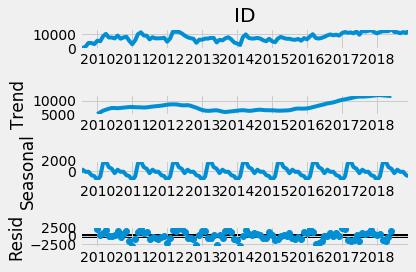

In [2]:
import pandas as pd
import folium

import warnings
import itertools
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

rodent_df = pd.read_csv("../data/rodent_inspection_clean.csv")
rodent_df.replace(0, float('NaN'), inplace=True)
rodent_df.dropna(subset = ["LATITUDE","LONGITUDE"], inplace=True)
rodent_df = rodent_df.round({"LATITUDE":2, "LONGITUDE":2})
rodent_df['INSPECTION_DATE'] = pd.to_datetime(rodent_df['INSPECTION_DATE'])
rodent_df['YEAR'] = pd.DatetimeIndex(rodent_df['INSPECTION_DATE']).year

rodent_df['ID'] = rodent_df.index
rodent_df['MONTH'] = pd.DatetimeIndex(rodent_df['INSPECTION_DATE']).month
rodent_df['YEAR_MONTH'] = rodent_df['YEAR'].astype(str)+'/'+rodent_df['MONTH'].astype(str).str.zfill(2)

monthly_data =  rodent_df.groupby(['YEAR_MONTH'], as_index=False)['ID'].count()
monthly_data = monthly_data[monthly_data['YEAR_MONTH'].str.slice(stop=4).astype(int)>2008 ]
monthly_data = monthly_data[monthly_data['YEAR_MONTH'].str.slice(stop=4).astype(int)<2019 ]
monthly_data.index = pd.to_datetime(monthly_data['YEAR_MONTH'], format='%Y/%m')
monthly_data.drop(['YEAR_MONTH'], axis=1,inplace = True)


plt.plot(monthly_data, color='blue', label='Occurrences of Rodents',linewidth=1.5)
plt.plot(monthly_data.rolling(window=12,center=False).mean(), color='red',label='Mean',linewidth=2)
plt.plot(monthly_data.rolling(window=12,center=False).std(),color='green',label='Standard Deviation',linewidth=2)
plt.title('Frequency, Rolling Mean & Standard Deviation')
plt.figure(figsize=(20,10))
plt.show()

# multiplicative
res = sm.tsa.seasonal_decompose(monthly_data.ID,period=12,model="additive")
fig = res.plot()
